In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # plotting
import PdM_functions as pdm # custom functions created for this project that are used in several notebooks

## 1. NASA Bearing Test Data

### Load Data File for Analysis

In [2]:
"""
Note:
=====
While all NASA data sets are referenced below, this study focuses on 
Test #1 which has 9 fields (timestamp + 8x sensor channels)
21,560 observations in the downsampled dataset (downsampled to ~0.1s timestep)

Test #1 outcome:
================
At the end of the test-to-failure experiment, inner race defect occurred in 
bearing 3 and roller element defect in bearing 4.
"""

# Create a dataframe of file options for easy reference
# We will select a dataset from this dataframe for the analysis/experiments
dataset_options = pd.DataFrame({
    'test':[1, 1, 1, 2, 2, 2, 3, 3, 3],
    'fp':[
        'NASA prepared data/test1_combined_ds.csv',            #0 
        'NASA prepared data/test1_abs_combined_ds.csv',        #1
        'NASA prepared data/merged_dataset_BearingTest_1.csv', #2
        'NASA prepared data/test2_combined_ds.csv',            #3
        'NASA prepared data/test2_abs_combined_ds.csv',        #4
        'NASA prepared data/merged_dataset_BearingTest_2.csv', #5
        'NASA prepared data/test3_combined_ds.csv',            #6
        'NASA prepared data/test3_abs_combined_ds.csv',        #7       
        'NASA prepared data/Reduced/merged_dataset_BearingTest_3.csv' #8
    ],
   ' chans':[
       ['B1_c1', 'B1_c2', 'B2_c3', 'B2_c4', 'B3_c5', 'B3_c6', 'B4_c7', 'B4_c8'],
       ['B1_c1', 'B1_c2', 'B2_c3', 'B2_c4', 'B3_c5', 'B3_c6', 'B4_c7', 'B4_c8'],
       ['B1_c1', 'B1_c2', 'B2_c3', 'B2_c4', 'B3_c5', 'B3_c6', 'B4_c7', 'B4_c8'],
       ['B1_c1', 'B2_c2', 'B3_c3', 'B4_c4'],
       ['B1_c1', 'B2_c2', 'B3_c3', 'B4_c4'],
       ['B1_c1', 'B2_c2', 'B3_c3', 'B4_c4'],
       ['B1_c1', 'B2_c2', 'B3_c3', 'B4_c4'],
       ['B1_c1', 'B2_c2', 'B3_c3', 'B4_c4'],
       ['B1_c1', 'B2_c2', 'B3_c3', 'B4_c4']       
   ]    
})
print('Available files as follows:')
print('===========================')
print(dataset_options.iloc[:, [0, 1]])

Available files as follows:
   test                                                 fp
0     1           NASA prepared data/test1_combined_ds.csv
1     1       NASA prepared data/test1_abs_combined_ds.csv
2     1  NASA prepared data/merged_dataset_BearingTest_...
3     2           NASA prepared data/test2_combined_ds.csv
4     2       NASA prepared data/test2_abs_combined_ds.csv
5     2  NASA prepared data/merged_dataset_BearingTest_...
6     3           NASA prepared data/test3_combined_ds.csv
7     3       NASA prepared data/test3_abs_combined_ds.csv
8     3  NASA prepared data/Reduced/merged_dataset_Bear...


In [3]:
# Select a dataset to analyse by selecting the appropriate index from above
selected_dataset = 0

In [4]:
# Load the data & grab a list of the channel names/refs
selected_fp = dataset_options['fp'][selected_dataset]
df_set = pd.read_csv(selected_fp, sep = ",")
chans = dataset_options.iloc[:, 2][selected_dataset]

In [5]:
df_set.describe()

,B1_c1,B1_c2,B2_c3,B2_c4,B3_c5,B3_c6,B4_c7,B5_c8
count,21560.000000,21560.000000,21560.000000,21560.000000,21560.000000,21560.000000,21560.000000,21560.000000
mean,-0.116648,-0.116262,-0.116260,-0.115546,-0.112209,-0.113254,-0.113527,-0.113032
std,0.097380,0.088524,0.094746,0.078626,0.118037,0.122855,0.096138,0.099437
min,-0.652000,-0.725000,-0.684000,-0.552000,-1.541000,-1.096000,-1.050000,-1.062000
25%,-0.181000,-0.173000,-0.181000,-0.166000,-0.186000,-0.188000,-0.166000,-0.168000
50%,-0.117000,-0.115000,-0.115000,-0.115000,-0.112000,-0.112000,-0.112000,-0.112000
75%,-0.054000,-0.059000,-0.051000,-0.063000,-0.039000,-0.037000,-0.061000,-0.059000
max,0.476000,0.576000,0.376000,0.330000,1.484000,1.875000,1.223000,0.776000


In [6]:
# Rename the columns as per channel definition from NASA test document
df_set = df_set.rename(columns = {'Unnamed: 0' : 'timestamp'})   

In [7]:
df_set.index = df_set['timestamp']

In [8]:
df_set.drop('timestamp', axis = 1, inplace = True)

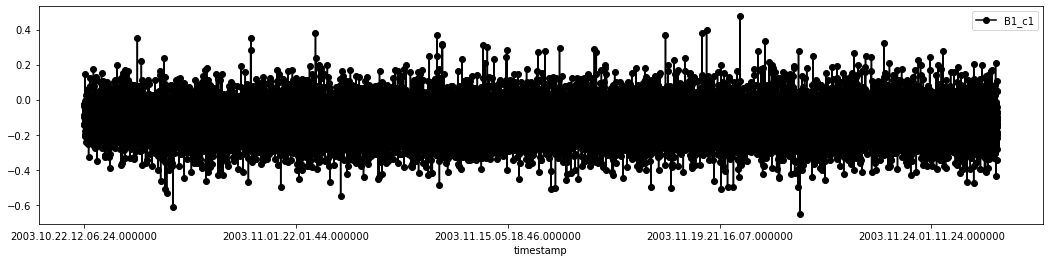

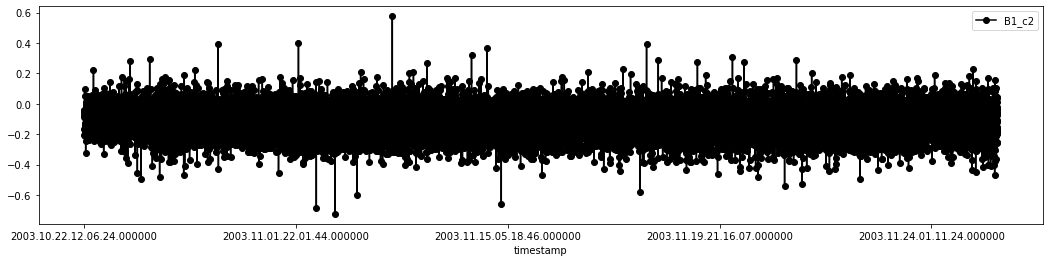

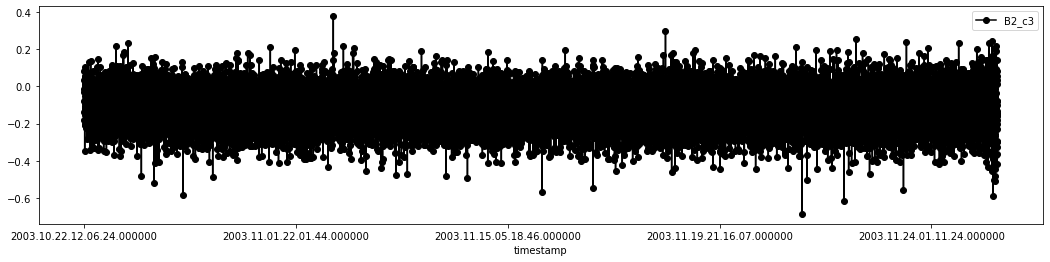

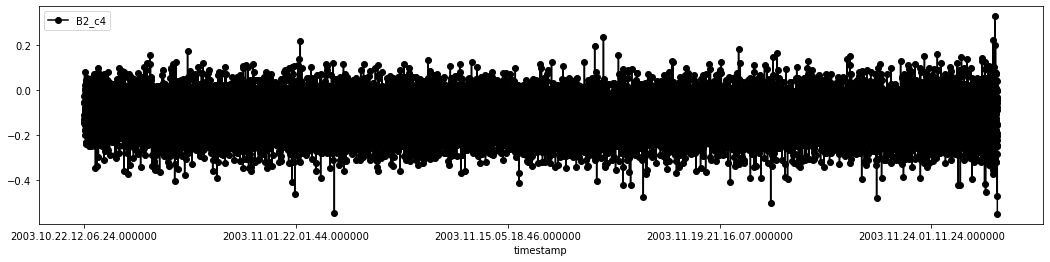

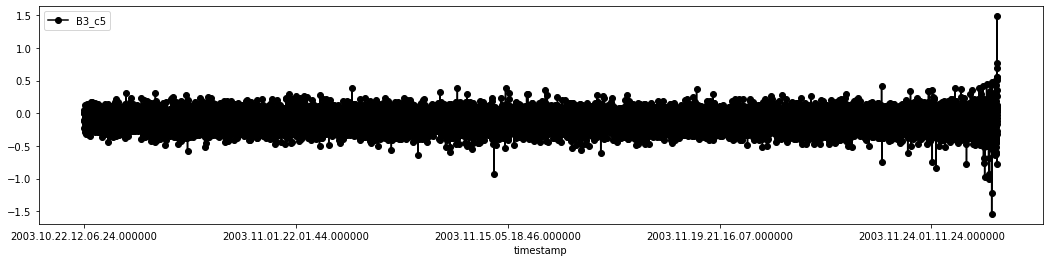

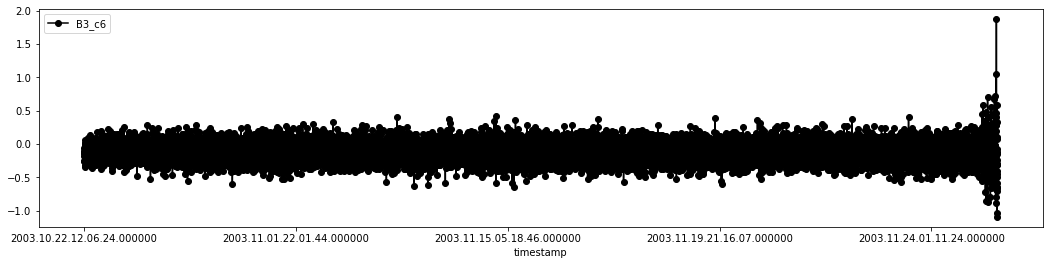

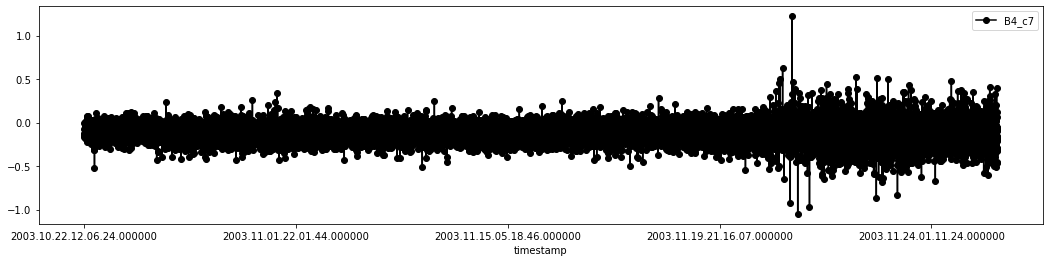

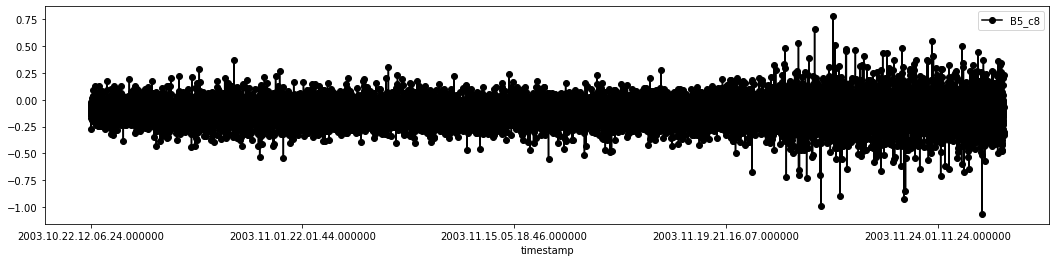

In [9]:
# Plot the downsampled signal
cols = df_set.columns
for chan in cols:
    df_set[[chan]].plot(figsize = (18, 4), color = 'black', marker = 'o');

In [10]:
# Some inspection on timestamps to help with cut definition (see later cells)
df_set['B5_c8'].iloc[0:1500]

timestamp
2003.10.22.12.06.24.000000   -0.142
2003.10.22.12.06.24.113750   -0.105
2003.10.22.12.06.24.227550   -0.068
2003.10.22.12.06.24.341300   -0.088
2003.10.22.12.06.24.455100   -0.024
                              ...  
2003.10.23.09.14.13.568850   -0.344
2003.10.23.09.14.13.682650   -0.034
2003.10.23.09.14.13.796400    0.027
2003.10.23.09.14.13.910200   -0.105
2003.10.23.09.14.14.023950   -0.051
Name: B5_c8, Length: 1500, dtype: float64

### PCA model: Principal Components analysis

In [11]:
from sklearn import preprocessing
from sklearn.decomposition import PCA
from matplotlib import gridspec
from matplotlib.pyplot import figure

In [12]:
# Normalize the data (min = 0, max = 1 for all columns)
scaler = preprocessing.MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_set), columns = df_set.columns, index = df_set.index)
df_scaled.describe()

,B1_c1,B1_c2,B2_c3,B2_c4,B3_c5,B3_c6,B4_c7,B5_c8
count,21560.000000,21560.000000,21560.000000,21560.000000,21560.000000,21560.000000,21560.000000,21560.000000
mean,0.474603,0.467900,0.535604,0.494846,0.472328,0.330780,0.411999,0.516305
std,0.086330,0.068043,0.089383,0.089145,0.039021,0.041351,0.042296,0.054101
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.417553,0.424289,0.474528,0.437642,0.447934,0.305621,0.388913,0.486398
50%,0.474291,0.468870,0.536792,0.495465,0.472397,0.331202,0.412670,0.516866
75%,0.530142,0.511914,0.597170,0.554422,0.496529,0.356446,0.435108,0.545702
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
# Alternative is to standardize the data 
#scaler = preprocessing.StandardScaler()
#df_scaled = pd.DataFrame(scaler.fit_transform(df_set), columns = df_set.columns, index = df_set.index)
#df_scaled.describe()

In [14]:
df_scaled.index[0:980]

Index(['2003.10.22.12.06.24.000000', '2003.10.22.12.06.24.113750',
       '2003.10.22.12.06.24.227550', '2003.10.22.12.06.24.341300',
       '2003.10.22.12.06.24.455100', '2003.10.22.12.06.24.568850',
       '2003.10.22.12.06.24.682650', '2003.10.22.12.06.24.796400',
       '2003.10.22.12.06.24.910200', '2003.10.22.12.06.25.023950',
       ...
       '2003.10.23.00.34.13.000000', '2003.10.23.00.34.13.113750',
       '2003.10.23.00.34.13.227550', '2003.10.23.00.34.13.341300',
       '2003.10.23.00.34.13.455100', '2003.10.23.00.34.13.568850',
       '2003.10.23.00.34.13.682650', '2003.10.23.00.34.13.796400',
       '2003.10.23.00.34.13.910200', '2003.10.23.00.34.14.023950'],
      dtype='object', name='timestamp', length=980)

In [15]:
data_cuts = pd.DataFrame({
    'cut_ref': [
        't1_1', #1
        't1_2', #2 
        't2_1', #3
        't2_2', #4
        't2_3', #5
        't3_1'  #6
    ],
    'cut_times': [
        ['2003.11.15.05.18.46.000000', '2003.11.15.05.18.47.000000'],          #1
        ['2003-10-29 14:39:46', '2003-11-15 05:18:46', '2003-11-19 21:06:07'], #2 
        ['2004-02-16 16:32:39', '2004-02-16 16:32:39'],                        #3
        ['2004.02.15.05.12.39.000000', '2004.02.15.05.12.39.000000'],          #4
        ['2004.02.14.05.12.39.000000', '2004.02.14.05.12.39.000000'],          #5
        ['2004.03.25.16.51.57.000000', '2004.03.25.16.51.57.000000'],          #6
    ]
})

In [16]:
# Review or populate above & select a cut to analyse/model
selected_cut = 't1_1'

ind = np.where(data_cuts['cut_ref'] == selected_cut)
t_cuts = data_cuts.iloc[np.min(ind), 1]
print('selected cuts: ', t_cuts)

selected cuts:  ['2003.11.15.05.18.46.000000', '2003.11.15.05.18.47.000000']


In [17]:
if len(t_cuts) == 3:
    df_train = df_scaled[t_cuts[0]:t_cuts[1]]
else:
    df_train = df_scaled[:t_cuts[0]]

df_test = df_scaled[t_cuts[1]:]

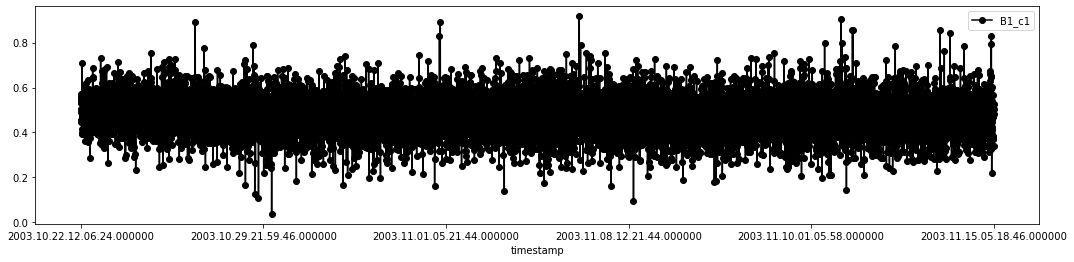

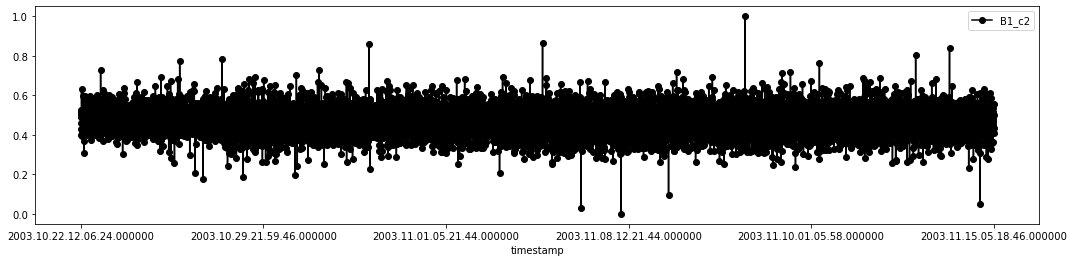

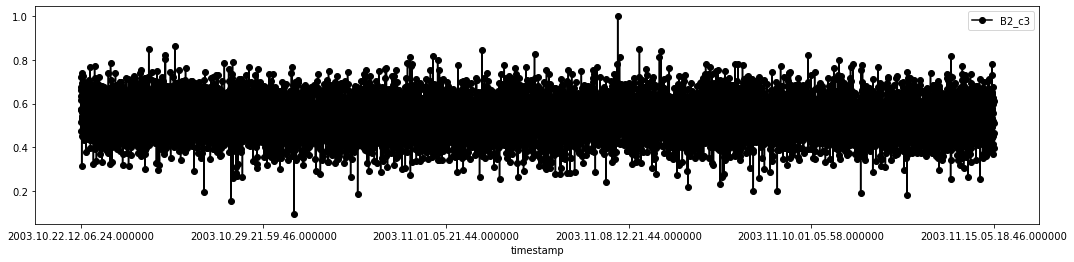

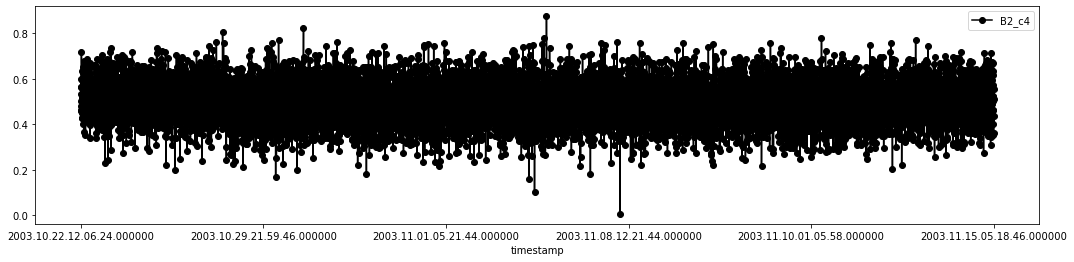

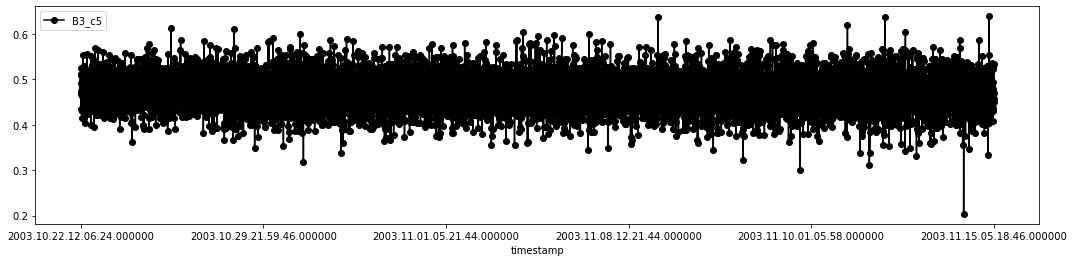

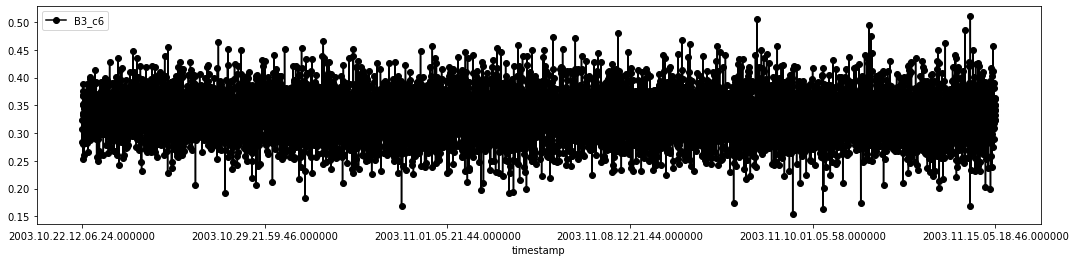

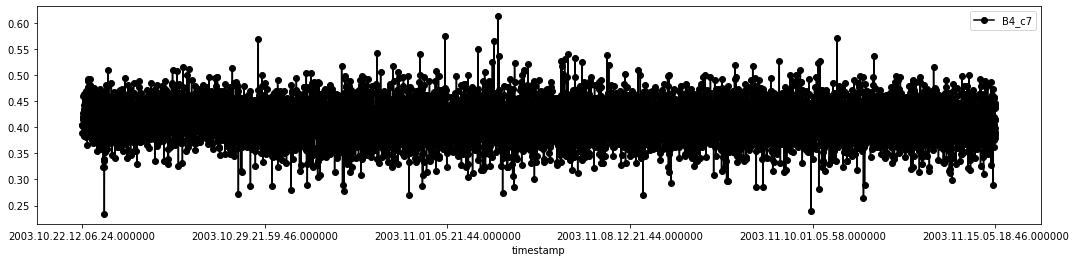

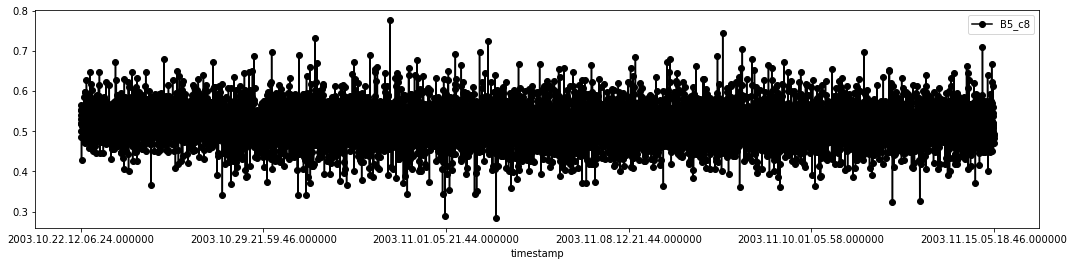

In [18]:
# Plot the downsampled train signals
for chan in cols:
    df_train[[chan]].plot(figsize=(18, 4), color = 'black', marker = 'o');

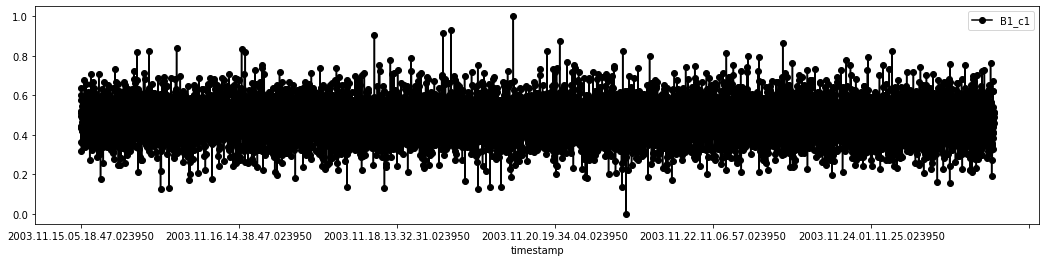

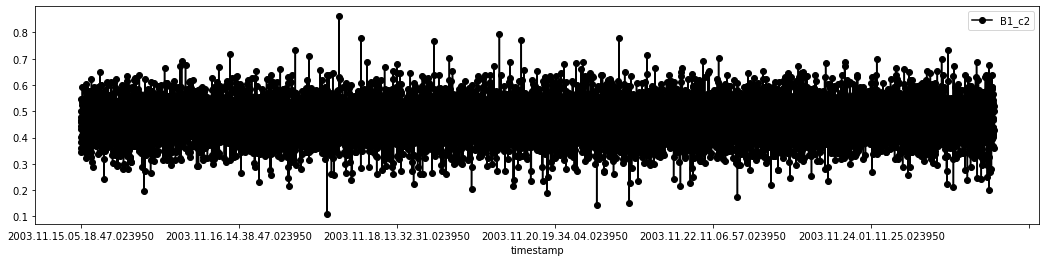

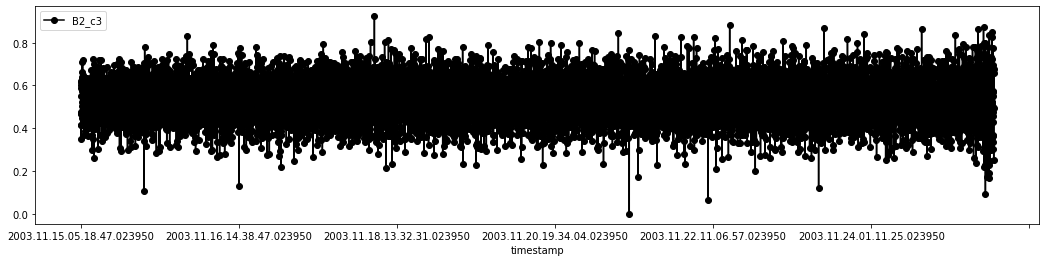

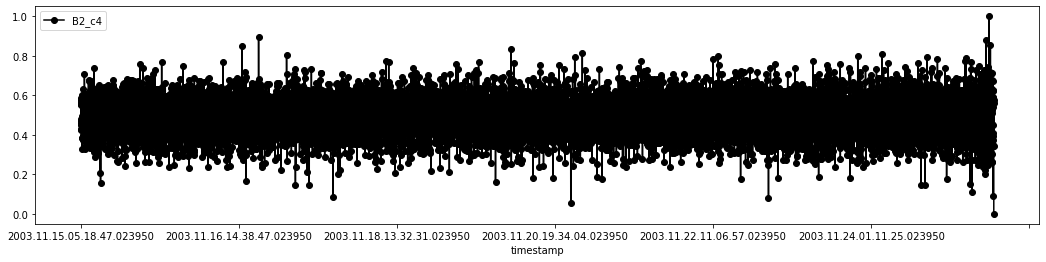

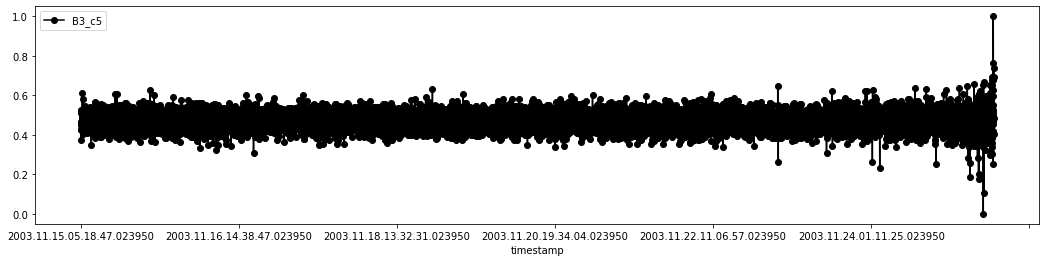

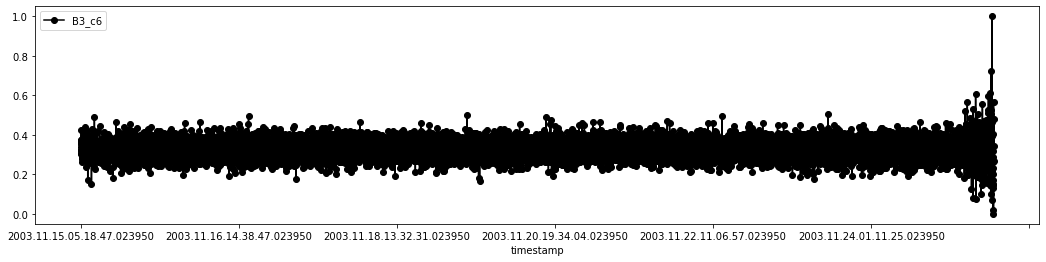

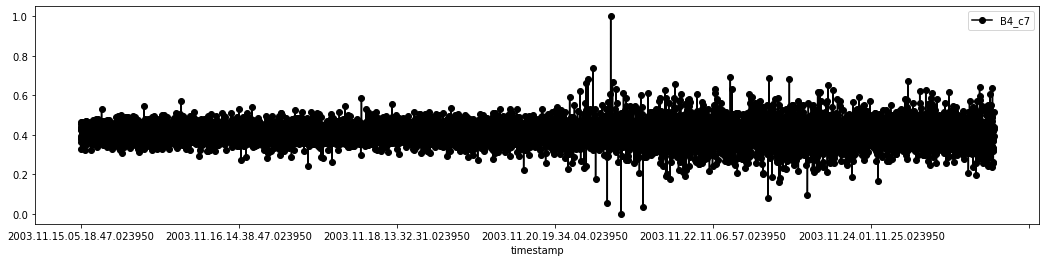

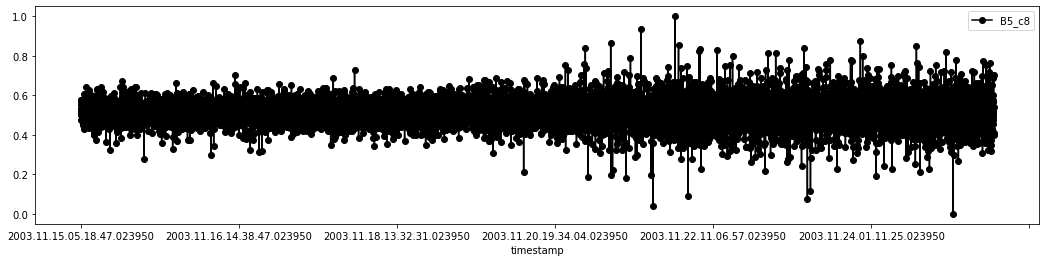

In [19]:
# Plot the downsampled test signals
for chan in cols:
    df_test[[chan]].plot(figsize=(18, 4), color = 'black', marker = 'o');

In [63]:
# Define the PCA model (all compoments)
n_comps = len(chans) # How many dimensions you want to reduce to
pca = PCA(n_components = n_comps, svd_solver = 'full')

# Compute PCA components for the training set
X_train_PCA = pca.fit_transform(df_train)
X_train_PCA = pd.DataFrame(X_train_PCA)
X_train_PCA.index = df_train.index

# Project the test data onto the PCA space
X_test_PCA = pca.transform(df_test)
X_test_PCA = pd.DataFrame(X_test_PCA)
X_test_PCA.index = df_test.index

# Print the explained variance
# 3 decimal places and don't use scientific notation
np.set_printoptions(precision = 3, suppress=True) 
print('Explained variance:', pca.explained_variance_ratio_)

Explained variance: [0.326 0.207 0.184 0.113 0.057 0.044 0.039 0.029]


In [82]:
# Redefine the PCA model (selecting eigenvectors with highest eigenvalues)
n_comps = 5 # How many dimensions you want to reduce to
pca = PCA(n_components = n_comps, svd_solver = 'full')

# Compute PCA components for the training set
X_train_PCA = pca.fit_transform(df_train)
X_train_PCA = pd.DataFrame(X_train_PCA)
X_train_PCA.index = df_train.index

# Project the test data onto the PCA space
X_test_PCA = pca.transform(df_test)
X_test_PCA = pd.DataFrame(X_test_PCA)
X_test_PCA.index = df_test.index

# Print the explained variance
# 3 decimal places and don't use scientific notation
np.set_printoptions(precision = 3, suppress=True) 
print('Explained variance:', pca.explained_variance_ratio_)

Explained variance: [0.326 0.207 0.184 0.113 0.057]


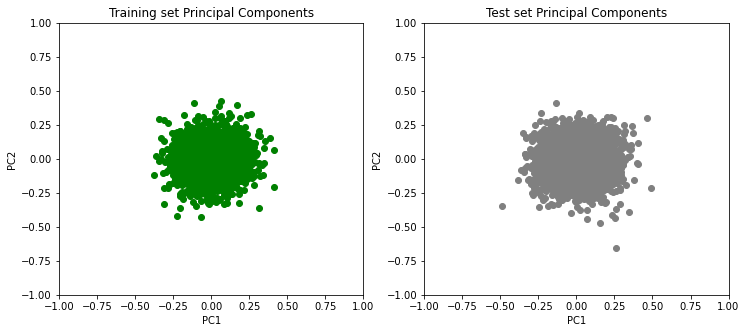

In [83]:
# Plot PC1 vs PC2 for training & test sets
fig, axes = plt.subplots(1, 2, figsize = (12, 5))
gs = gridspec.GridSpec(1, 2, width_ratios = [1, 1])

ax0 = plt.subplot(gs[0])
ax0.scatter(X_train_PCA.loc[:, 0], X_train_PCA.loc[:, 1], color = 'green')
ax0.set_xlabel('PC1')
ax0.set_ylabel('PC2')
ax0.set_xlim(-1, 1)
ax0.set_ylim(-1, 1)
ax0.set_title('Training set Principal Components')

ax1 = plt.subplot(gs[1])
ax1.scatter(X_test_PCA.loc[:, 0], X_test_PCA.loc[:, 1], color = 'grey')
ax1.set_xlabel('PC1')
ax1.set_ylabel('PC2')
ax1.set_xlim(-1, 1)
ax1.set_ylim(-1, 1)
ax1.set_title('Test set Principal Components')

plt.show()

In [84]:
# Move on to calculate Mahalanobis Distance 
# This is a multivatiate distance from centroid calculation that
# can be useful for unsupervised anomaly detection
data_train = np.array(X_train_PCA.values)
data_test = np.array(X_test_PCA.values)

In [85]:
#cov_matrix, inv_cov_matrix  = cov_matrix(data_train)

In [86]:
cov_matrix = np.cov(data_train, rowvar = False)
inv_cov_matrix = np.linalg.inv(cov_matrix)

In [87]:
# Mean of each column: PC1, PC2 (it should be very close to zero)
mean_distr = data_train.mean(axis = 0) # axis=0 means that average is computed per column
np.set_printoptions(precision = 3, suppress = False)
print('Mean distr', mean_distr)

Mean distr [-8.703e-18 -4.365e-17  6.783e-18  1.652e-17 -3.763e-17]


In [88]:
# Mahalanobis Distance calculation
dist_test = pdm.MahalanobisDist(inv_cov_matrix, mean_distr, data_test, verbose=False)
dist_train = pdm.MahalanobisDist(inv_cov_matrix, mean_distr, data_train, verbose=False)

print("Minimum & maximum MD in training set:", min(dist_train), max(dist_train) )
print("Minimum & maximum MD in test set    :", min(dist_test), max(dist_test) )

Minimum & maximum MD in training set: 0.289227637187678 8.731392961286582
Minimum & maximum MD in test set    : 0.319888304744049 11.968472525993588


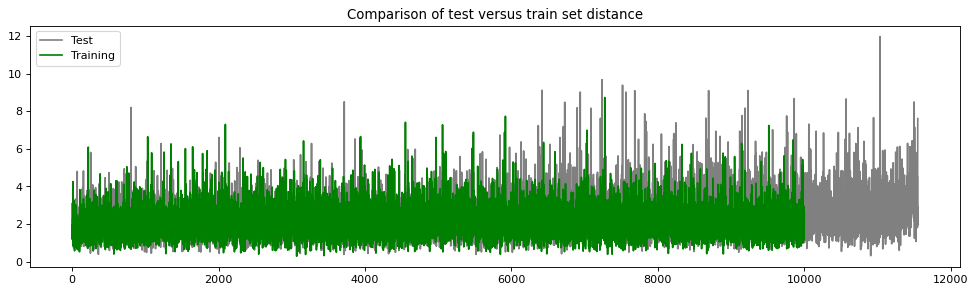

In [89]:
figure(figsize = (15, 4), dpi = 80)
plt.plot(np.array(dist_test), label = "Test", color = 'grey')
plt.plot(np.array(dist_train) , label = "Training", color = 'green')
plt.legend(loc = "upper left")
plt.title("Comparison of test versus train set distance")
plt.show()

In [90]:
threshold = pdm.MD_threshold(dist_train, extreme = True) # extreme = True; 2x mean of incoming data
print("Threshold value for flagging an anomaly is", "{:.2f}".format(threshold) )

Threshold value for flagging an anomaly is 6.25


/Users/jasonpayne/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


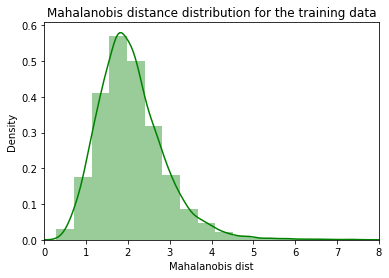

In [91]:
import seaborn as sns
plt.figure()
sns.distplot(dist_train,
             bins = 20, 
             kde= True, 
            color = 'green');
plt.xlim([0.0, 8])
plt.xlabel('Mahalanobis dist')
plt.title('Mahalanobis distance distribution for the training data')
plt.show()

In [92]:
anomaly_train = pd.DataFrame()
anomaly_train['Mob dist']= dist_train
anomaly_train['Thresh'] = threshold
# If Mob dist above threshold: Flag as anomaly
anomaly_train['Anomaly'] = anomaly_train['Mob dist'] > anomaly_train['Thresh']
anomaly_train.index = X_train_PCA.index

n_outliers_train = anomaly_train[ anomaly_train['Anomaly'] == True].shape[0]
print("There are", n_outliers_train, "anomalies in the train set out of", anomaly_train.shape[0], "points")
print("Corresponding to " + str(round(100*(n_outliers_train / anomaly_train.shape[0]), 2)) + '%')

There are 18 anomalies in the train set out of 10001 points
Corresponding to 0.18%


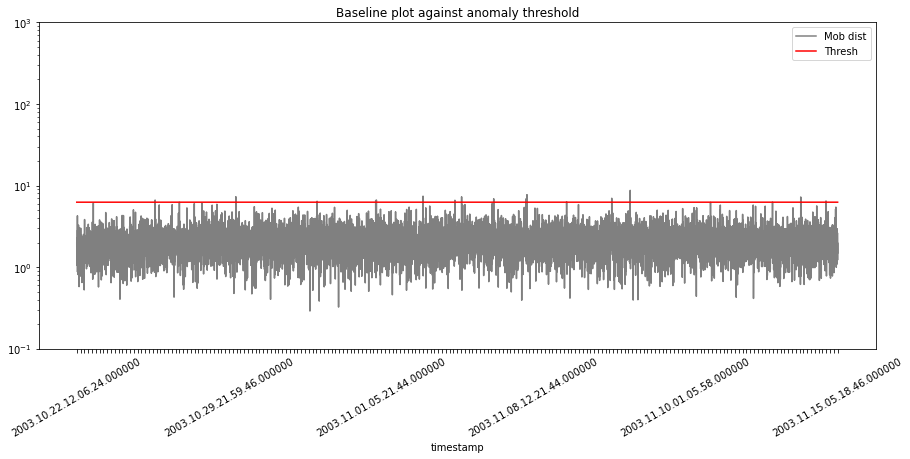

In [93]:
anomaly_train.plot(logy=True, figsize = (15,6), ylim = [1e-1,1e3], color = ['grey', 'red'])
plt.xticks(np.arange(0, anomaly_train.shape[0], 50), fontsize=10, rotation = 30)
plt.title('Baseline plot against anomaly threshold')
plt.show()

In [94]:
anomaly = pd.DataFrame()
anomaly['Mob dist']= dist_test
anomaly['Thresh'] = threshold
# If Mob dist above threshold: Flag as anomaly
anomaly['Anomaly'] = anomaly['Mob dist'] > anomaly['Thresh']
anomaly.index = X_test_PCA.index

n_outliers = anomaly[anomaly['Anomaly'] == True].shape[0]
print("There are", n_outliers, "anomalies in the test set out of", anomaly.shape[0], "points")
print("Corresponding to " + str(round(100*(n_outliers / anomaly.shape[0]), 2)) + '%')

There are 65 anomalies in the test set out of 11551 points
Corresponding to 0.56%


In [95]:
anomaly = pd.DataFrame()
anomaly['Mob dist']= dist_test
anomaly['Thresh'] = threshold
# If Mob dist above threshold: Flag as anomaly
anomaly['Anomaly'] = anomaly['Mob dist'] > anomaly['Thresh']
anomaly.index = X_test_PCA.index
anomaly.head()

,Mob dist,Thresh,Anomaly
timestamp,,,
2003.11.15.05.18.47.023950,1.314951,6.252805,False
2003.11.15.05.28.46.000000,3.116059,6.252805,False
2003.11.15.05.28.46.113750,2.058338,6.252805,False
2003.11.15.05.28.46.227550,2.095107,6.252805,False
2003.11.15.05.28.46.341300,3.071775,6.252805,False


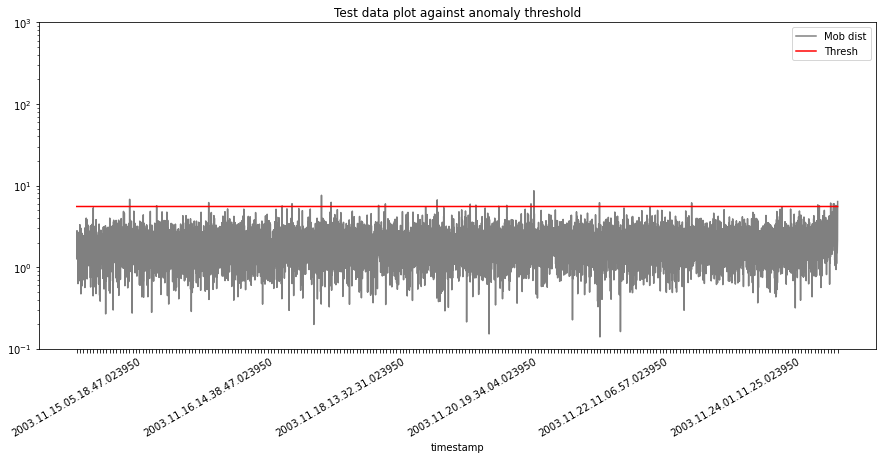

In [79]:
anomaly.plot(logy=True, figsize = (15,6), ylim = [1e-1,1e3], color = ['grey', 'red'])
plt.xticks(np.arange(0, anomaly.shape[0], 50), fontsize=10, rotation = 30)
plt.title('Test data plot against anomaly threshold')
plt.show()

In [80]:
anomaly_alldata = pd.concat([anomaly_train, anomaly])

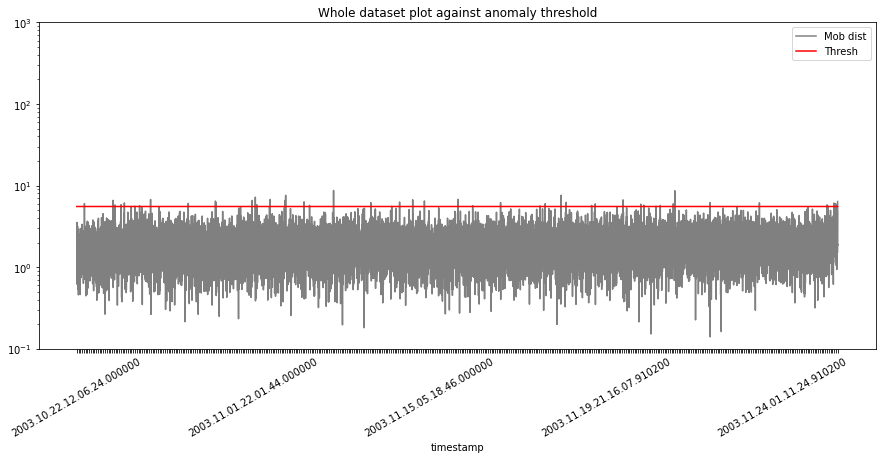

In [81]:
anomaly_alldata.plot(logy=True, figsize = (15,6), ylim = [1e-1,1e3], color = ['grey', 'red'])
plt.xticks(np.arange(0, anomaly_alldata.shape[0], 50), fontsize=10, rotation = 30)
plt.title('Whole dataset plot against anomaly threshold')
plt.show()

### Robust PCA

The Robust PCA analysis method is explained in https://arxiv.org/pdf/0912.3599.pdf
The method converts and input data matrix into separate L & S matrices where:
- L = Low rank data (resistant to outliers)
      i.e., what's mostly constant between the various observations
- S = Sparse (outliers)

In our method we use the L matrix as input to regular PCA from scikit learn
A function for R-PCA using principle 'component pursuit by alternating directions' is 
located in the PdM_functions.py file imported as pdm. 
The theory and implementation of the algorithm is described in https://arxiv.org/pdf/0912.3599.pdf 


In [42]:
# Define the PCA model
n_comps = 2
pca = PCA(n_components = n_comps, svd_solver = 'full')

In [43]:
# Compute all PCA components for the training set
L_train, S = pdm.R_pca(df_train).fit()
X_train_PCA = pca.fit_transform(L_train)
X_train_PCA = pd.DataFrame(X_train_PCA)
X_train_PCA.index = df_train.index

# Project the test data onto the PCA space
L_test, S = pdm.R_pca(df_test).fit()
X_test_PCA = pca.transform(L_test)
X_test_PCA = pd.DataFrame(X_test_PCA)
X_test_PCA.index = df_test.index

iteration: 1, error: 0.5382239881183578
iteration: 100, error: 0.003678104328762292
iteration: 200, error: 0.00236680034277464
iteration: 300, error: 0.0009751675680187491
iteration: 400, error: 0.00040575438081786404
iteration: 500, error: 0.00015338462330576028
iteration: 600, error: 0.00011237206472524474
iteration: 700, error: 5.21514129507148e-05
iteration: 757, error: 1.3148181268184817e-05
iteration: 1, error: 0.5309514577863456
iteration: 100, error: 0.003324110513195597
iteration: 200, error: 0.0026860490170126906
iteration: 300, error: 0.0010425306019776369
iteration: 400, error: 0.0005218004874449383
iteration: 500, error: 0.0002602317992642984
iteration: 600, error: 0.00019607706927868106
iteration: 700, error: 9.458998430909877e-05
iteration: 800, error: 3.693924707119317e-05
iteration: 840, error: 1.423242656661612e-05


In [44]:
# 3 decimal places and don't use scientific notation
np.set_printoptions(precision = 3, suppress=True) 
print('Explained variance:', pca.explained_variance_ratio_)

Explained variance: [0.944 0.054]


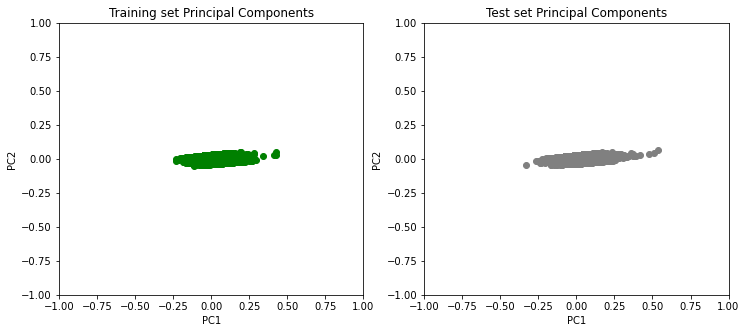

In [45]:
fig, axes = plt.subplots(1, 2, figsize = (12, 5))
gs = gridspec.GridSpec(1, 2, width_ratios = [1, 1])

ax0 = plt.subplot(gs[0])
ax0.scatter(X_train_PCA.loc[:, 0], X_train_PCA.loc[:, 1], color = 'green')
ax0.set_xlabel('PC1')
ax0.set_ylabel('PC2')
ax0.set_xlim(-1, 1)
ax0.set_ylim(-1, 1)
ax0.set_title('Training set Principal Components')

ax1 = plt.subplot(gs[1])
ax1.scatter(X_test_PCA.loc[:, 0], X_test_PCA.loc[:, 1], color = 'grey')
ax1.set_xlabel('PC1')
ax1.set_ylabel('PC2')
ax1.set_xlim(-1, 1)
ax1.set_ylim(-1, 1)
ax1.set_title('Test set Principal Components')

plt.show()

In [46]:
data_train = np.array(X_train_PCA.values)
data_test = np.array(X_test_PCA.values)

In [47]:
cov_matrix = np.cov(data_train, rowvar = False)
inv_cov_matrix = np.linalg.inv(cov_matrix)

In [48]:
# Mean of each column: PCA1, PCA2
# - It should be very close to zero
mean_distr = data_train.mean(axis = 0) # axis = 0 means that average is computed per column
np.set_printoptions(precision = 3, suppress=False)
mean_distr

array([-4.014e-17,  1.746e-15])

In [49]:
dist_test = pdm.MahalanobisDist(inv_cov_matrix, mean_distr, data_test, verbose = False)
dist_train = pdm.MahalanobisDist(inv_cov_matrix, mean_distr, data_train, verbose = False)

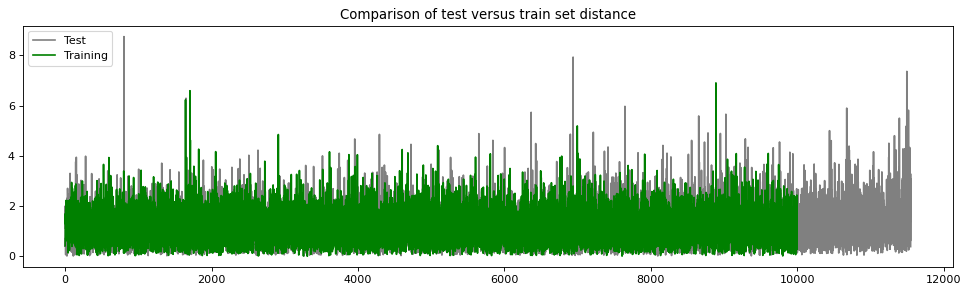

In [50]:
figure(figsize = (15, 4), dpi = 80)
plt.plot(np.array(dist_test), label = "Test", color = 'grey')
plt.plot(np.array(dist_train) , label = "Training", color = 'green')
plt.legend(loc = "upper left")
plt.title("Comparison of test versus train set distance")
plt.show()

In [51]:
# Calculate anomaly threshold distance
threshold = pdm.MD_threshold(dist_train, extreme = True) # extreme is 3x mean
print("Threshold value for flagging an anomaly is", "{:.2f}".format(threshold) )

Threshold value for flagging an anomaly is 3.74


/Users/jasonpayne/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


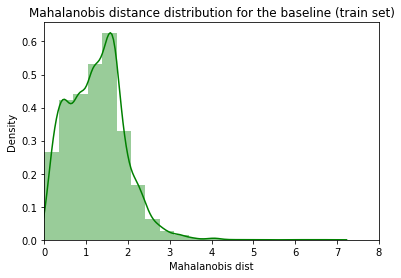

In [52]:
import seaborn as sns
plt.figure()
sns.distplot(dist_train,
             bins = 20, 
             kde= True, 
            color = 'green');
plt.xlim([0.0, 8])
plt.xlabel('Mahalanobis dist')
plt.title('Mahalanobis distance distribution for the baseline (train set)')
plt.show()

In [53]:
anomaly_train = pd.DataFrame()
anomaly_train['Mob dist'] = dist_train
anomaly_train['Thresh'] = threshold

# If Mob dist is above threshold then flag as anomaly
anomaly_train['Anomaly'] = anomaly_train['Mob dist'] > anomaly_train['Thresh']
anomaly_train.index = X_train_PCA.index

n_outliers_train = anomaly_train[ anomaly_train['Anomaly'] == True].shape[0]
print("There are", n_outliers_train, "anomalies in the train set out of", anomaly_train.shape[0], "points")
print("Corresponding to " + str(round(100*(n_outliers_train / anomaly_train.shape[0]), 2)) + '%')

There are 27 anomalies in the train set out of 10001 points
Corresponding to 0.27%


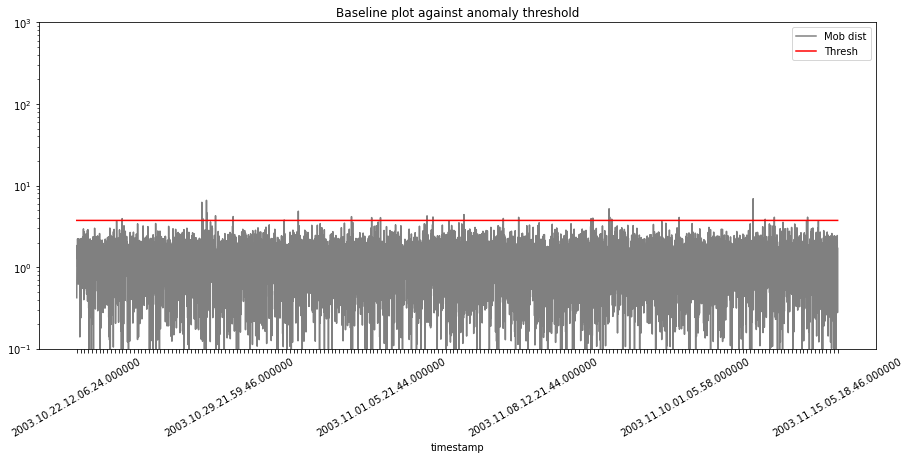

In [54]:
anomaly_train.plot(logy=True, figsize = (15, 6), ylim = [1e-1, 1e3], color = ['grey', 'red'])
plt.xticks(np.arange(0, anomaly_train.shape[0], 50), fontsize=10, rotation = 30)
plt.title('Baseline plot against anomaly threshold')
plt.show()

In [55]:
anomaly = pd.DataFrame()
anomaly['Mob dist']= dist_test
anomaly['Thresh'] = threshold

# If Mob dist is above threshold then flag as anomaly
anomaly['Anomaly'] = anomaly['Mob dist'] > anomaly['Thresh']
anomaly.index = X_test_PCA.index

n_outliers = anomaly[ anomaly['Anomaly'] == True].shape[0]
print("There are", n_outliers, "anomalies in the test set out of", anomaly.shape[0], "points")
print("Corresponding to " + str(round(100 * (n_outliers / anomaly.shape[0]), 2)) + '%')

There are 79 anomalies in the test set out of 11551 points
Corresponding to 0.68%


In [56]:
anomaly = pd.DataFrame()
anomaly['Mob dist']= dist_test
anomaly['Thresh'] = threshold
# If Mob dist above threshold: Flag as anomaly
anomaly['Anomaly'] = anomaly['Mob dist'] > anomaly['Thresh']
anomaly.index = X_test_PCA.index
anomaly.head()

,Mob dist,Thresh,Anomaly
timestamp,,,
2003.11.15.05.18.47.023950,1.125278,3.736785,False
2003.11.15.05.28.46.000000,1.721135,3.736785,False
2003.11.15.05.28.46.113750,2.006149,3.736785,False
2003.11.15.05.28.46.227550,0.400671,3.736785,False
2003.11.15.05.28.46.341300,0.724087,3.736785,False


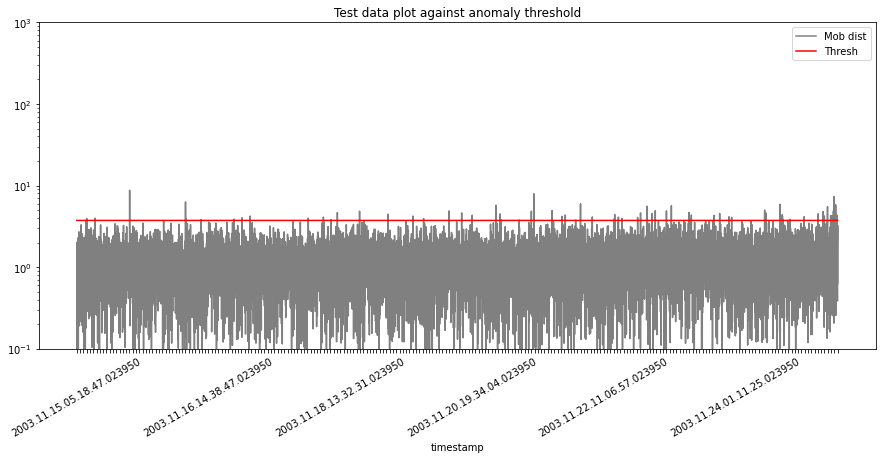

In [57]:
anomaly.plot(logy=True, figsize = (15,6), ylim = [1e-1, 1e3], color = ['grey', 'red'])
plt.xticks(np.arange(0, anomaly.shape[0], 50), fontsize=10, rotation = 30)
plt.title('Test data plot against anomaly threshold')
plt.show()

In [58]:
anomaly_alldata = pd.concat([anomaly_train, anomaly])

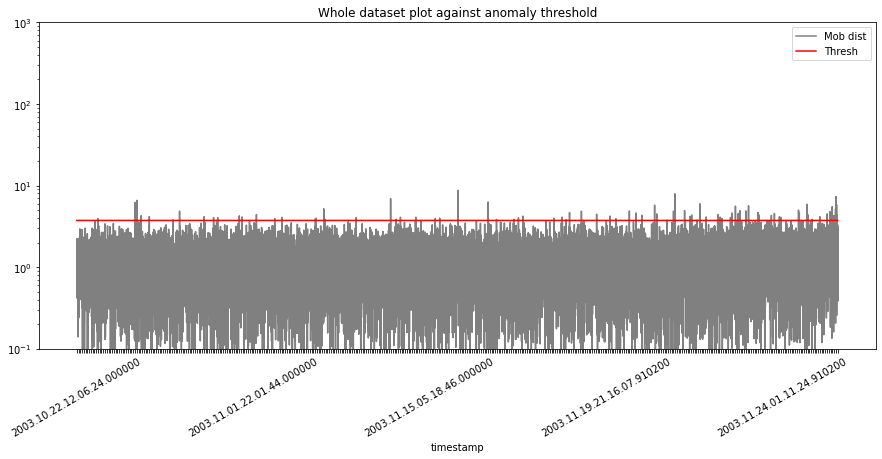

In [59]:
anomaly_alldata.plot(logy = True, figsize = (15, 6), ylim = [1e-1, 1e3], color = ['grey', 'red'])
plt.xticks(np.arange(0, anomaly_alldata.shape[0], 50), fontsize=10, rotation = 30)
plt.title('Whole dataset plot against anomaly threshold')
plt.show()

### One-class Support Vector Machine (SVM)

In [96]:
from sklearn.svm import OneClassSVM

# An estimation of anomaly population of the dataset
outliers_fraction = 0.01

# Train a one-class SVM 
svm_model =  OneClassSVM(nu = 0.95 * outliers_fraction) 
svm_model.fit(pd.DataFrame(df_train))

OneClassSVM(nu=0.0095)

In [120]:
print('Train & test windows:')
print([df_train.index[0], df_train.index[-1]])
print([df_test.index[0], df_test.index[-1]])

Train & test windows:
['2003.10.22.12.06.24.000000', '2003.11.15.05.18.46.000000']
['2003.11.15.05.18.47.023950', '2003.11.25.23.39.57.023950']


In [121]:
#df_test.drop('anomaly', axis = 1, inplace = True)

In [186]:
preds = pd.Series(svm_model.predict(df_test))
test = pd.DataFrame({'B3_c5':pd.Series(df_test['B3_c5'])})
svm_out = pd.DataFrame({'timestamp':df_test.index, 'Prediction':preds})

In [187]:
B3_c5 = df_test['B3_c5']
B3_c5 = B3_c5.reset_index()
B3_c5.drop('timestamp', axis = 1, inplace = True)
svm_out['B3_c5'] = B3_c5
svm_out['Prediction'] = svm_out['Prediction'].map({1: 0, -1: 1})

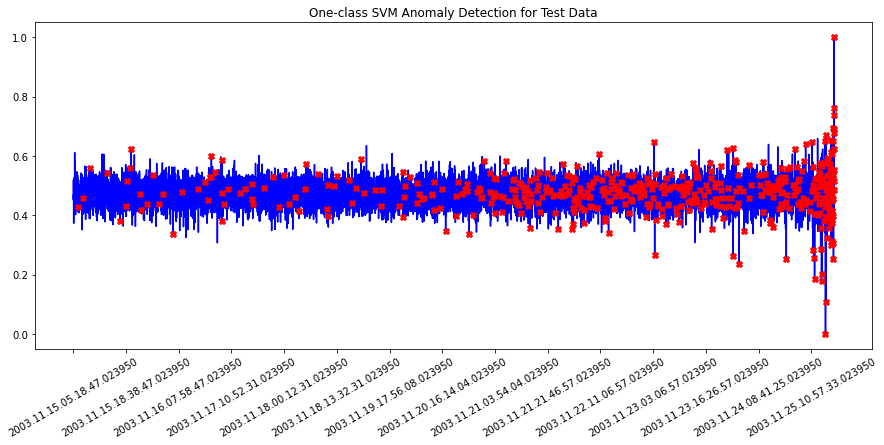

In [188]:
# visualisation of anomaly throughout time (viz 1)
fig, ax = plt.subplots(figsize = (15, 6))
plt.xticks(np.arange(0, df_test.shape[0], 800), fontsize = 10, rotation = 30)
plt.title('One-class SVM Anomaly Detection for Test Data')

a = svm_out.loc[svm_out['Prediction'] == 1, ['timestamp', 'B3_c5']] # anomaly

#lin, = ax.plot(df_test.index, df_test['B3_c5'], color = 'blue', lw=1)
#mark, = ax.plot(df_test.index, df_test['B3_c5'], color = 'blue', marker='o', alpha=0.1, ms=5)

ax.plot(df_test.index, df_test['B3_c5'], color = 'blue', zorder = 1)
ax.scatter(a['timestamp'], a['B3_c5'], color ='red', marker = 'X', zorder = 2)
plt.show()

In [220]:
anomaly_freq_factor = 5
anomaly_freq_thres = anomaly_freq_factor - 2
anomaly_roll = svm_out.rolling(anomaly_freq_factor, center = True).sum() 
anomaly_roll

,Prediction,B3_c5
0,NaN,NaN
1,NaN,NaN
2,0.0,2.360000
3,0.0,2.266116
4,0.0,2.238678
...,...,...
11546,5.0,3.201653
11547,4.0,3.131240
11548,3.0,2.941488
11549,NaN,NaN


In [221]:
#anomaly_roll.loc[0:5, 'Prediction'] = anomaly_roll.loc[0:5, 'Prediction'].fillna(0)
anomaly_roll['Prediction'] = anomaly_roll['Prediction'].fillna(0)

In [222]:
anomaly_roll.loc[anomaly_roll['Prediction'] < anomaly_freq_thres, 'Prediction'] = 0

In [223]:
anomaly_roll.loc[anomaly_roll['Prediction'] >= anomaly_freq_thres, 'Prediction'] = 1

In [224]:
anomaly_roll['Prediction'].unique()

array([0., 1.])

In [225]:
#anomaly_roll['Prediction'] = anomaly_roll['Prediction'].map({4: 1, 0.0: 0})
#anomaly_roll['Prediction'] = anomaly_roll['Prediction'].map({3: 1, 0.0: 0})
#anomaly_roll['Prediction'][0, 1] = 0
#anomaly_roll['Prediction'][11549] = svm_out['Prediction'][11549]
#anomaly_roll['Prediction'][11550] = svm_out['Prediction'][11550]
#anomaly_roll['Prediction'].unique()

In [226]:
svm_out['Prediction'] = anomaly_roll['Prediction']

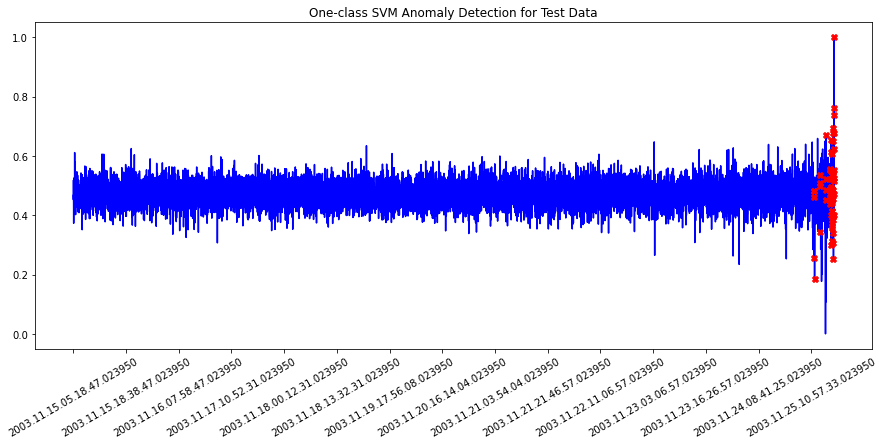

In [227]:
# visualisation of anomaly throughout time (viz 1)
fig, ax = plt.subplots(figsize = (15, 6))
plt.xticks(np.arange(0, df_test.shape[0], 800), fontsize = 10, rotation = 30)
plt.title('One-class SVM Anomaly Detection for Test Data')

a = svm_out.loc[svm_out['Prediction'] == 1, ['timestamp', 'B3_c5']] # anomaly

#lin, = ax.plot(df_test.index, df_test['B3_c5'], color = 'blue', lw=1)
#mark, = ax.plot(df_test.index, df_test['B3_c5'], color = 'blue', marker='o', alpha=0.1, ms=5)

ax.plot(df_test.index, df_test['B3_c5'], color = 'blue', zorder = 1)
ax.scatter(a['timestamp'], a['B3_c5'], color ='red', marker = 'X', zorder = 2)
plt.show()

### Isolation Forest

In [229]:
from sklearn.ensemble import IsolationForest

# Define outlier fraction
outliers_fraction = 0.10

# Train isolation forest 
isfo_model =  IsolationForest(contamination = outliers_fraction)
isfo_model.fit(df_train)

/Users/jasonpayne/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


IsolationForest(contamination=0.1)

In [230]:
# Create and format predictions for test data
isfo_preds = pd.Series(isfo_model.predict(df_test))
isfo_test = pd.DataFrame({'B3_c5':pd.Series(df_test['B3_c5'])})
isfo_out = pd.DataFrame({'timestamp':df_test.index, 'Prediction':preds})

In [231]:
B3_c5 = df_test['B3_c5']
B3_c5 = B3_c5.reset_index()
B3_c5.drop('timestamp', axis = 1, inplace = True)
isfo_out['B3_c5'] = B3_c5
isfo_out['Prediction'] = isfo_out['Prediction'].map( {1: 0, -1: 1} )

In [232]:
num_anomaly_pts = sum(isfo_out['Prediction'] == 1)
all_test_pts = len(df_test)
print(str(num_anomaly_pts ) + ' out of ' + str(all_test_pts) + ' data points classified as anomalies')
print(str(round(100 * (num_anomaly_pts / all_test_pts), 2)) + '% of the data')

509 out of 11551 data points classified as anomalies
4.41% of the data


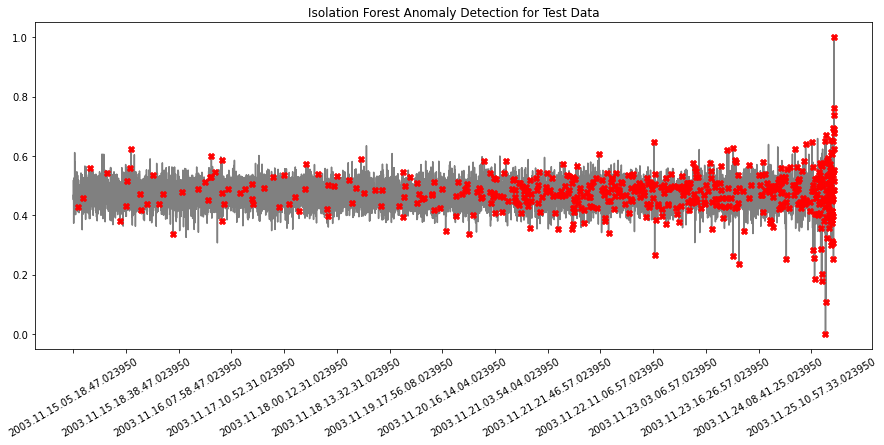

In [236]:
# Visualisation of anomaly detection throughout time 
fig, ax = plt.subplots(figsize = (15, 6))
plt.xticks(np.arange(0, df_test.shape[0], 800), fontsize = 10, rotation = 30)
plt.title('Isolation Forest Anomaly Detection for Test Data')
a = isfo_out.loc[isfo_out['Prediction'] == 1, ['timestamp', 'B3_c5']] # anomaly
ax.plot(df_test.index, df_test['B3_c5'], color = 'grey', zorder = 1)
ax.scatter(a['timestamp'], a['B3_c5'], color ='red', marker = 'X', zorder = 2)
plt.show()

### Recurrent Nueral Network (RNN)

RNN learn to recognize sequence in the data and then make prediction based on the previous sequence. We consider an anomaly when the next data points are distant from RNN prediction. Aggregation, size of sequence and size of prediction for anomaly are important parameters to have relevant detection.
Here we make learn from 50 previous values, and we predict just the 1 next value.

In [320]:
df_train

,B1_c1,B1_c2,B2_c3,B2_c4,B3_c5,B3_c6,B4_c7,B5_c8
timestamp,,,,,,,,
2003.10.22.12.06.24.000000,0.558511,0.527287,0.472642,0.564626,0.474711,0.323797,0.405191,0.500544
2003.10.22.12.06.24.113750,0.502660,0.401230,0.516038,0.460317,0.509421,0.307304,0.405191,0.520675
2003.10.22.12.06.24.227550,0.543440,0.518063,0.633962,0.598639,0.434380,0.284416,0.388913,0.540805
2003.10.22.12.06.24.341300,0.552305,0.428132,0.617925,0.562358,0.511736,0.322787,0.402992,0.529924
2003.10.22.12.06.24.455100,0.491135,0.488086,0.723585,0.501134,0.508760,0.281050,0.427629,0.564744
...,...,...,...,...,...,...,...,...
2003.11.15.05.08.46.682650,0.523936,0.514220,0.677358,0.526077,0.474050,0.350050,0.397712,0.509793
2003.11.15.05.08.46.796400,0.480496,0.498847,0.466038,0.554422,0.457851,0.332885,0.413550,0.482046
2003.11.15.05.08.46.910200,0.525709,0.411222,0.509434,0.360544,0.449587,0.363177,0.415750,0.491295


In [321]:
df_test

,B1_c1,B1_c2,B2_c3,B2_c4,B3_c5,B3_c6,B4_c7,B5_c8
timestamp,,,,,,,,
2003.11.15.05.18.47.023950,0.495567,0.465027,0.603774,0.424036,0.466777,0.359138,0.434228,0.528836
2003.11.15.05.28.46.000000,0.439716,0.345119,0.472642,0.575964,0.452231,0.308987,0.328641,0.575082
2003.11.15.05.28.46.113750,0.363475,0.431207,0.416981,0.460317,0.518347,0.303938,0.362077,0.521763
2003.11.15.05.28.46.227550,0.508865,0.360492,0.467925,0.556689,0.465785,0.351733,0.437308,0.551143
2003.11.15.05.28.46.341300,0.445922,0.545734,0.348113,0.568027,0.456860,0.369573,0.422349,0.573993
...,...,...,...,...,...,...,...,...
2003.11.25.23.39.56.568850,0.452128,0.531130,0.573585,0.349206,0.624793,0.022215,0.435988,0.414581
2003.11.25.23.39.56.682650,0.460993,0.518063,0.493396,0.343537,0.401983,0.344329,0.440387,0.539173
2003.11.25.23.39.56.796400,0.508865,0.358186,0.677358,0.558957,0.737851,0.478963,0.430708,0.397171


In [322]:
data_n = df_scaled

# important parameters and train/test size
prediction_time = 1 
testdatasize = 700
unroll_length = 50 # consider n last datapoints (this will be sequence length)
testdatacut = testdatasize + unroll_length  + 1

pred_chan = 'B3_c5'

# train data
x_train = df_scaled[0:-prediction_time-testdatacut].values
y_train = df_scaled[prediction_time:-testdatacut][pred_chan].values

# test data
x_test = df_scaled[0-testdatacut:-prediction_time].values
y_test = df_scaled[prediction_time-testdatacut:][pred_chan].values

# See the shape
print("x_train", x_train.shape)
print("y_train", y_train.shape)
print("x_test", x_test.shape)
print("y_test", y_test.shape)

x_train (20808, 8)
y_train (20808,)
x_test (750, 8)
y_test (750,)


In [323]:
#unroll: create sequence of 50 previous data points for each data points
def unroll(data, sequence_length = 24):
    result = []
    for index in range(len(data) - sequence_length):
        result.append(data[index: index + sequence_length])
    return np.asarray(result)

# Adapt the datasets for the sequence data shape
x_train = unroll(x_train, unroll_length)
x_test  = unroll(x_test, unroll_length)
y_train = y_train[-x_train.shape[0]:]
y_test  = y_test[-x_test.shape[0]:]

# See the shape
print("x_train", x_train.shape)
print("y_train", y_train.shape)
print("x_test", x_test.shape)
print("y_test", y_test.shape)

x_train (20758, 50, 8)
y_train (20758,)
x_test (700, 50, 8)
y_test (700,)


In [324]:
# Load libraries for RNN
# Keras acts as an interface for the TensorFlow library
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
import time #helper libraries
from keras.models import model_from_json
import sys

ModuleNotFoundError: No module named 'tensorflow'

In [86]:
# Build the model
lstm_model = Sequential()

In [87]:
lstm_model.add(LSTM(
    #input_shape = x_train.shape[-1],
    return_sequences = True,
    units = 50))

In [88]:
lstm_model.add(Dropout(0.2))
lstm_model.add(LSTM(100, return_sequences = False))
lstm_model.add(Dropout(0.2))
lstm_model.add(Dense(units = 1))
lstm_model.add(Activation('linear'))

start = time.time()
lstm_model.compile(loss='mse', optimizer='rmsprop')
print('compilation time : {}'.format(time.time() - start))

compilation time : 0.011955738067626953


In [89]:
# Train the model

# Some notes on hyperparameters:
# ==============================
# Batch Size: Hyperparameter of gradient descent that controls the no. of 
# training samples to work through before the model’s internal parameters are updated.

"""
- Batch Gradient Descent: Batch Size = Size of Training Set
- Stochastic Gradient Descent: Batch Size = 1
- Mini-Batch Gradient Descent: 1 < Batch Size < Size of Training Set
In the case of mini-batch gradient descent, popular batch sizes include 32, 64, and 128 samples.
"""

# Epochs: Hyperparameter of gradient descent that controls the number of complete 
# passes through the training dataset.

lstm_model.fit(
    x_train,
    y_train,
    batch_size = 3028, # TODO -- Update
    epochs = 30,
    validation_split = 0.1)

Epoch 1/30
1/1 [==============================] - 1s 1s/step - loss: 0.0311 - val_loss: 0.1960
Epoch 2/30
1/1 [==============================] - 0s 50ms/step - loss: 0.1795 - val_loss: 0.0042
Epoch 3/30
1/1 [==============================] - 0s 50ms/step - loss: 0.0049 - val_loss: 3.3034e-04
Epoch 4/30
1/1 [==============================] - 0s 46ms/step - loss: 0.0017 - val_loss: 2.9756e-05
Epoch 5/30
1/1 [==============================] - 0s 66ms/step - loss: 0.0013 - val_loss: 1.5034e-05
Epoch 6/30
1/1 [==============================] - 0s 42ms/step - loss: 0.0013 - val_loss: 1.1812e-05
Epoch 7/30
1/1 [==============================] - 0s 42ms/step - loss: 0.0013 - val_loss: 8.8751e-06
Epoch 8/30
1/1 [==============================] - 0s 57ms/step - loss: 0.0013 - val_loss: 8.6981e-06
Epoch 9/30
1/1 [==============================] - 0s 56ms/step - loss: 0.0013 - val_loss: 8.7071e-06
Epoch 10/30
1/1 [==============================] - 0s 66ms/step - loss: 0.0012 - val_loss: 1.0258e-05

In [90]:
# Create the list of difference between prediction and test data
loaded_model = lstm_model
diff = []
ratio = []
p = loaded_model.predict(x_test)
# Predictions = lstm.predict_sequences_multiple(loaded_model, x_test, 50, 50)
for u in range(len(y_test)):
    pr = p[u][0]
    ratio.append((y_test[u] / pr) - 1)
    diff.append(abs(y_test[u] - pr))

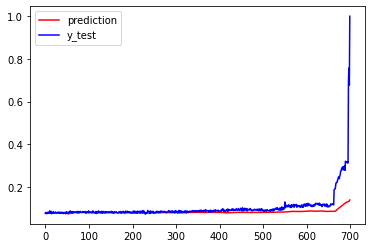

In [91]:
# plot the prediction and the reality (for the test data)
fig, axs = plt.subplots()
axs.plot(p, color = 'red', label = 'prediction')
axs.plot(y_test, color = 'grey', label = 'actual')
plt.legend(loc = 'upper left')
plt.show()

In [141]:
outliers_fraction = 0.10 # Results for 0.3 is also interesting! 

# select the most distant prediction/reality data points as anomalies
diff = pd.Series(diff)
number_of_outliers = int(outliers_fraction * len(diff))
print('Number of outliers: ' + str(number_of_outliers))

threshold = diff.nlargest(number_of_outliers).min()
print('Threshold: ' + str(round(threshold, 4)))

# data with anomaly label (test data part)
test = (diff >= threshold).astype(int)

# the training data part where we didn't predict anything (overfitting possible): no anomaly
complement = pd.Series(0, index=np.arange(len(data_n) - testdatasize))


Number of outliers: 210
Threshold: 0.0127


In [142]:
diff.nlargest(70)

699    0.861501
697    0.625532
696    0.570353
698    0.542776
689    0.195414
         ...   
607    0.032094
573    0.031256
658    0.031216
558    0.030973
636    0.030944
Length: 70, dtype: float64

In [143]:
# Create and format predictions for test data
lstm_preds = complement.append(test, ignore_index = 'True')
lstm_test = pd.DataFrame({'B3_c5':pd.Series(data_n['B3_c5'])})
lstm_out = pd.DataFrame({'timestamp':data_n.index, 'Prediction':lstm_preds})

In [144]:
df_test = df_scaled
B3_c5 = df_test['B3_c5']
B3_c5 = B3_c5.reset_index()
B3_c5.drop('timestamp', axis = 1, inplace = True)
lstm_out['B3_c5'] = B3_c5
#lstm_out['Prediction'] = lstm_out['Prediction'].map( {1: 0, -1: 1} )
lstm_out

,timestamp,Prediction,B3_c5
0,2003-10-22 12:06:24,0,0.000000
1,2003-10-22 12:09:13,0,0.001542
2,2003-10-22 12:14:13,0,0.007800
3,2003-10-22 12:19:13,0,0.005777
4,2003-10-22 12:24:13,0,0.006938
...,...,...,...
2151,2003-11-25 16:07:32,1,0.312073
2152,2003-11-25 23:13:21,1,0.701757
2153,2003-11-25 23:19:56,1,0.757422
2154,2003-11-25 23:29:56,1,0.677214


In [145]:
num_anomaly_pts = sum(lstm_out['Prediction'] == 1)
all_test_pts = len(y_test)
print(str(num_anomaly_pts ) + ' out of ' + str(all_test_pts) + ' data points classified as anomalies')
print(str(round(100 * (num_anomaly_pts / all_test_pts), 2)) + '% of the data')

210 out of 700 data points classified as anomalies
30.0% of the data


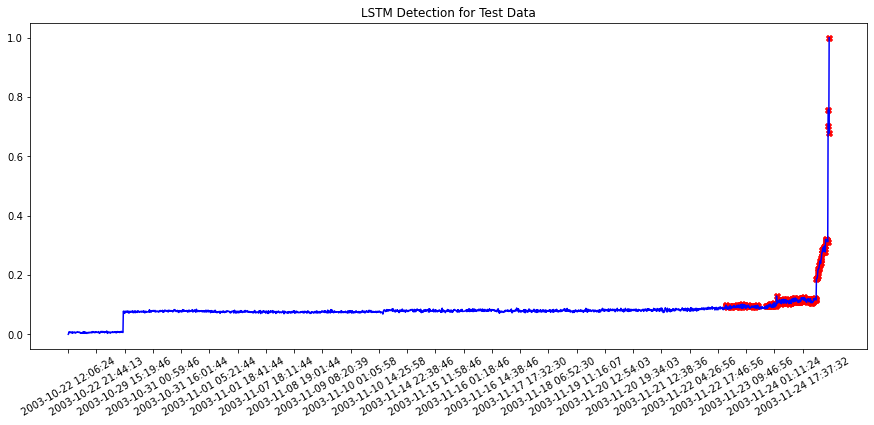

In [146]:
# visualisation of anomaly detection throughout time 
fig, ax = plt.subplots(figsize = (15, 6))
plt.xticks(np.arange(0, df_test.shape[0], 80), fontsize = 10, rotation = 30)
plt.title('LSTM Detection for Test Data')
a = lstm_out.loc[lstm_out['Prediction'] == 1, ['timestamp', 'B3_c5']] # anomaly
ax.plot(df_test.index, df_test['B3_c5'], color = 'blue', zorder = 1)
ax.scatter(a['timestamp'], a['B3_c5'], color ='red', marker = 'X', zorder = 2)
plt.show()